<a href="https://colab.research.google.com/github/Ahmed-Gomaa1/Database-project2-System-Database-of-faculty/blob/master/California_housing_prices_EDA_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
houses= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')

In [ ]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Filling Missing Values 

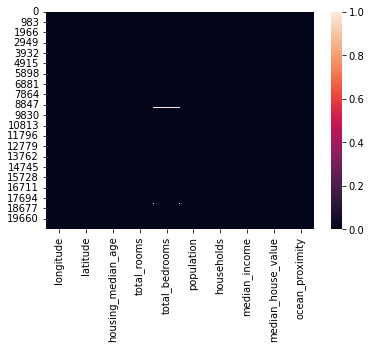

In [ ]:
sns.heatmap(houses.isnull())

In [ ]:
houses['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [ ]:
lost=houses['total_bedrooms'].dropna()
houses['total_bedrooms']=houses['total_bedrooms'].fillna(pd.Series(np.random.choice(lost,size=len(houses.index))))

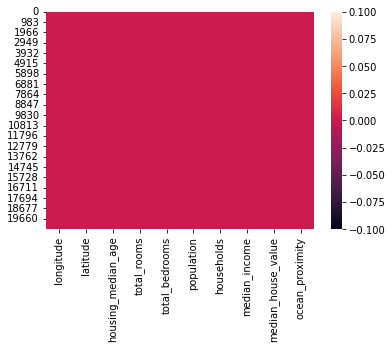

In [ ]:
sns.heatmap(houses.isnull())

## EDA for Data

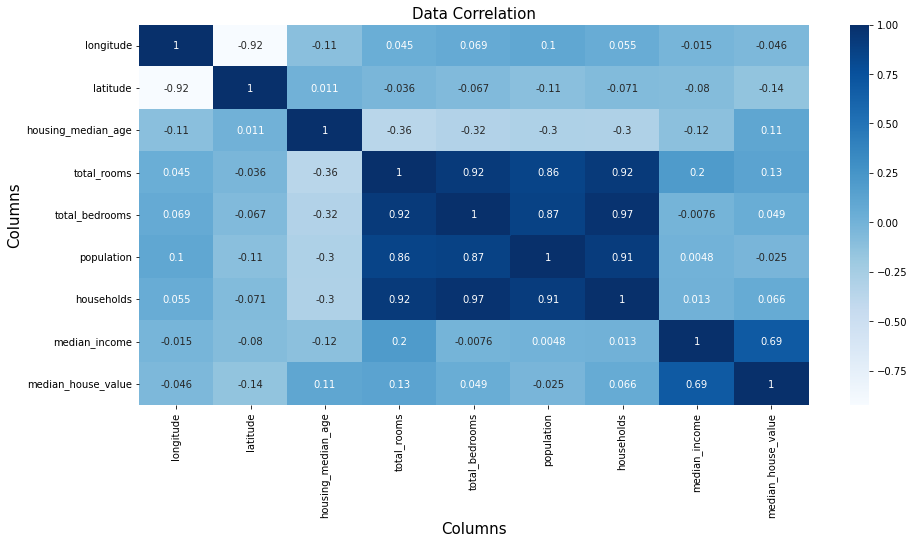

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(houses.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()

In [ ]:
houses.drop('longitude',axis=1,inplace=True)

In [ ]:
houses.drop('latitude',axis=1,inplace=True)

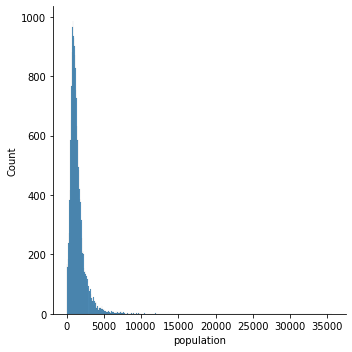

In [ ]:
sns.displot(houses['population'])

Most Population Between 0 and 3800

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


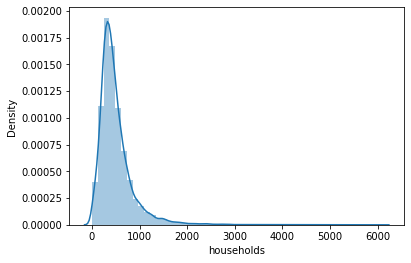

In [ ]:
sns.distplot(houses['households'])

Most group of people residing within a home unit is between 0 and 900

In [ ]:
ocean_values=houses["ocean_proximity"].value_counts()
ocean_values 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

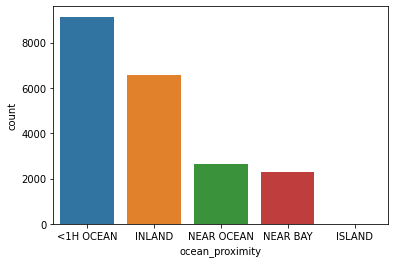

In [ ]:
sns.countplot(x = "ocean_proximity",data=houses,order=ocean_values.index)

<1H OCEAN is the highest percentage value at Location of Houses

In [ ]:
Xdata=houses[['total_bedrooms','total_rooms','housing_median_age','population','households','median_income']]

[Text(0, 0, 'total_bedrooms'),
 Text(0, 0, 'total_rooms'),
 Text(0, 0, 'housing_median_age'),
 Text(0, 0, 'population'),
 Text(0, 0, 'households'),
 Text(0, 0, 'median_income')]

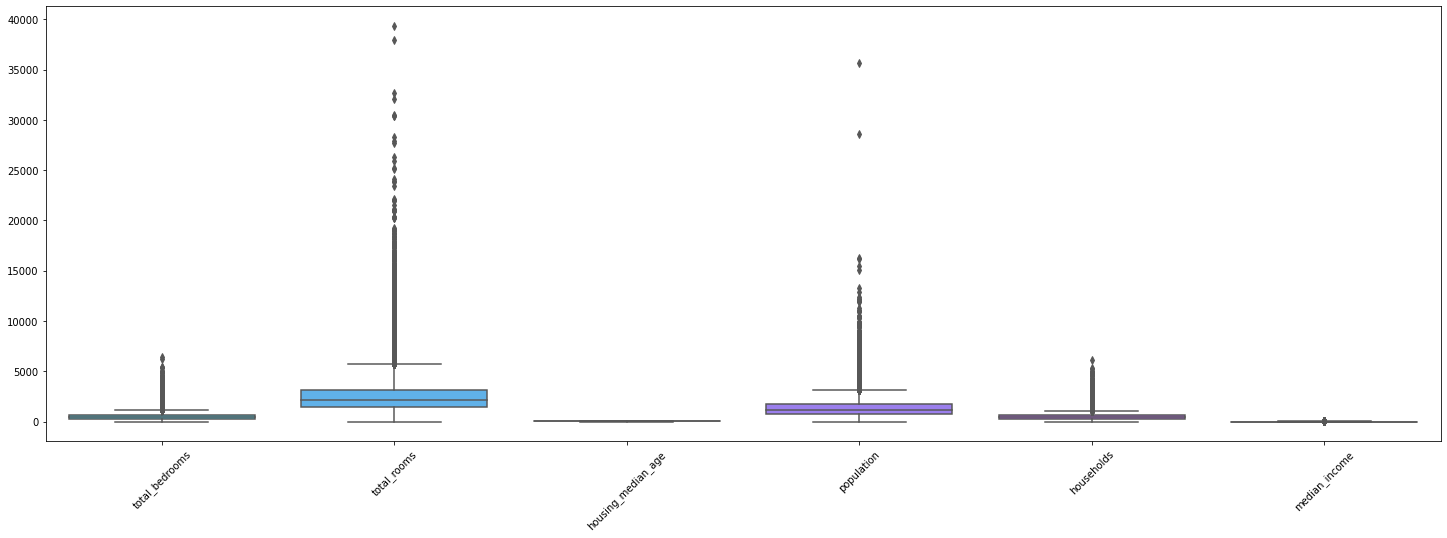

In [ ]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=Xdata)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

Total_Rooms has highest percentage oF outliers and come after it population Column

Distribution of Numerical HousingData

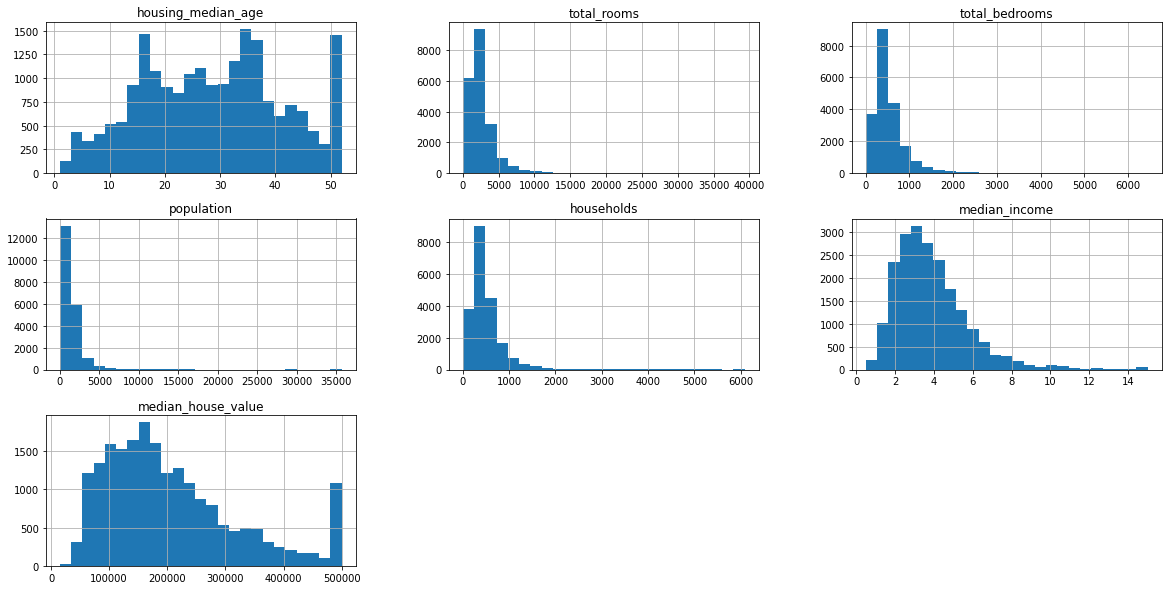

In [ ]:
houses.hist(bins=25,figsize=(20,10));


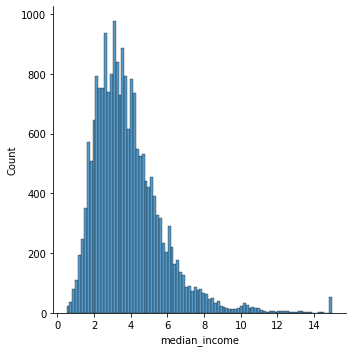

In [ ]:
sns.displot(houses['median_income'])

Most households within a block of houses has income  between 1 and 7 

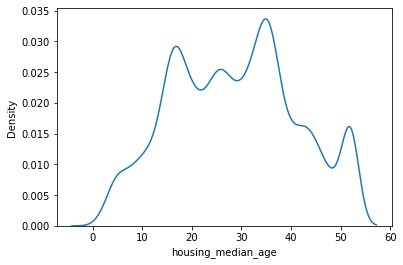

In [ ]:
sns.kdeplot(data=houses, x="housing_median_age")

Most houses has age between 10 and 45 

## Modeling

In [ ]:
x = houses.drop(["median_house_value"],axis=1).values
y= houses['median_house_value'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Encoding With LabelEncoder

In [ ]:
le = LabelEncoder()
houses['ocean_proximity']=le.fit_transform(houses['ocean_proximity'])

Reduce Effect of Outliers With RobustScaler

In [ ]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

***LinearRegression Model***

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_train,y_train)

0.5691668880562499

In [ ]:
reg.score(x_test,y_test)


0.5595072147839006

In [ ]:
y_pred = reg.predict(x_test)


In [ ]:
df = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred})


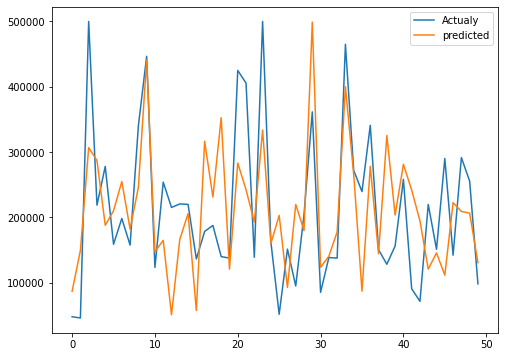

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df[:50])
plt.legend(["Actualy","predicted"]);

***Ridge Model***

In [ ]:
rid = linear_model.Ridge(alpha=0.7)
rid.fit(x_train,y_train)

Ridge(alpha=0.7)

In [ ]:
rid.score(x_train,y_train)


0.569166873569536

In [ ]:
rid.score(x_test,y_test)

0.5595235676943876

In [ ]:
y_pred1 = rid.predict(x_test)

In [ ]:
df1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred1})

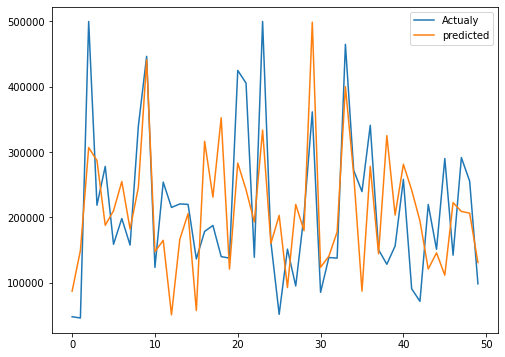

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df1[:50])
plt.legend(["Actualy","predicted"]);

***Lasso Model***

In [ ]:
lass = linear_model.Lasso(alpha=0.7)
lass.fit(x_train,y_train)

Lasso(alpha=0.7)

In [ ]:
lass.score(x_train,y_train)


0.5691668864417483

In [ ]:
lass.score(x_test,y_test)

0.5595116853509662

In [ ]:
y_pred2 = lass.predict(x_test)

In [ ]:
df2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred2})

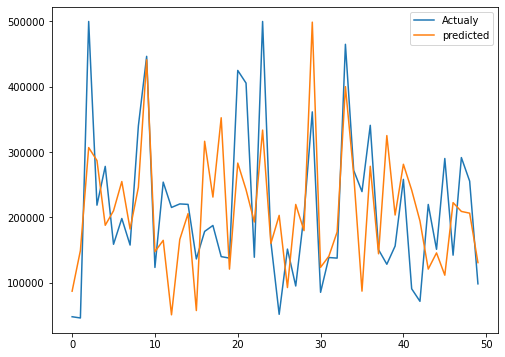

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df2[:50])
plt.legend(["Actualy","predicted"]);

In [ ]:
reg_score = r2_score(y_test,y_pred)
reg_score


0.5595072147839006

In [ ]:
rid_score = r2_score(y_test,y_pred1)
rid_score

0.5595235676943876

In [ ]:
las_score = r2_score(y_test,y_pred2)
las_score

0.5595116853509662

In [ ]:
reg_MAPE = mean_absolute_percentage_error(y_test , y_pred)
reg_MAPE

0.35459799659971486

In [ ]:
rid_MAPE = mean_absolute_percentage_error(y_test , y_pred1)
rid_MAPE

0.35460800572314544

In [ ]:
las_MAPE = mean_absolute_percentage_error(y_test , y_pred2)
las_MAPE

0.3545998940802635